# 6.2 Exploratory Analysis

### This script contains the following:

#### 1. Import Visualization Libraries and Data
#### 2. Create subset for exploratory visual analysis
#### 3. Visualizations
     3.1 Correlation matrix heatmap
     3.2 Scatterplots
     3.3 Pair Plot
     3.4 Categorical Plots
#### 4. Revisiting Key Questions
#### 5. Define hypotheses     

## 1. Import Visualization Libraries and Data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data

path = r'C:\Users\ashle\Documents\08-2024 King County, Washington_House Sales Analysis'

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'kc_house_data_cleaned.csv'))

## 2. Create subset for exploratory visual analysis

In [5]:
df.head()

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0  2014-10-13  221900.0         3       1.00         1180      5650     1.0   
1  2014-12-09  538000.0         3       2.25         2570      7242     2.0   
2  2015-02-25  180000.0         2       1.00          770     10000     1.0   
3  2014-12-09  604000.0         4       3.00         1960      5000     1.0   
4  2015-02-18  510000.0         3       2.00         1680      8080     1.0   

   waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  \
0           0     0          3      7        1180              0      1955   
1           0     0          3      7        2170            400      1951   
2           0     0          3      6         770              0      1933   
3           0     0          5      7        1050            910      1965   
4           0     0          3      8        1680              0      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [12]:
# Add a price per square foot column
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [14]:
# Create 'age' column (years since built)
df['house_age'] = 2024 - df['yr_built']

In [18]:
# Create 'years_since_renovation' column
df['years_since_renovation'] = np.where(
    df['yr_renovated'] == 0,
    df['house_age'], # If no renovation, use the house age
    2024 - df['yr_renovated'] # If renovated, calculate years since renovation
)

In [22]:
# Create a subset excluding non-pertinent variables
sub = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'yr_built', 'house_age', 'years_since_renovation']]

In [24]:
sub.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  sqft_living15  \
0     0          3      7        1180              0           1340   
1     0          3      7        2170            400           1690   
2     0          3      6         770              0           2720   
3     0          5      7        1050            910           1360   
4     0          3      8        1680              0           1800   

   sqft_lot15  yr_renovated  yr_built  house_age  years_since_renovation  
0        5650             0      1955         69                      69  
1        7639          1991      1951         73                      33  
2        8062             0      1933         91                      91  
3        5000             0      1965         59                      59  
4        7503             0      1987         37                      37

## 3. Visualizations

### 3.1 Correlation matrix heatmap

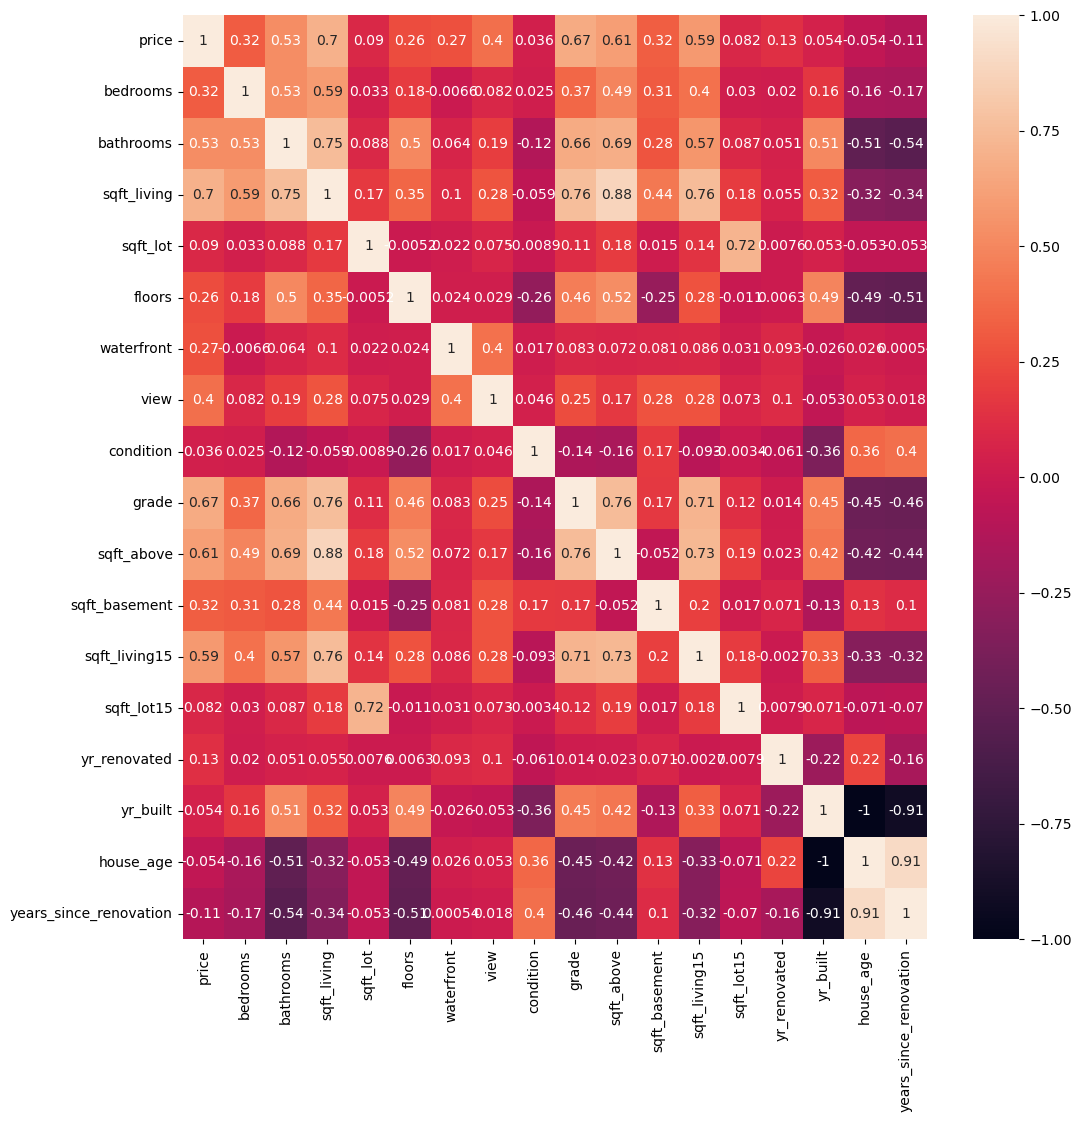

In [26]:
# Create a subplot to define figsize
f,ax = plt.subplots(figsize=(12,12))

# Generate the correlation heatmap using the correlation matrix and display the correlation coefficient in each cell.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

Insights:

- Square Footage of Living Space and House Price: There is a strong positive correlation between the square footage of living space and house price. As the square footage increases, the price of the house tends to rise as well.

- Square Footage Above Surface Level and Home Price: There is a strong positive linear correlation between the square footage above surface level and home price. This aligns with the strong correlation observed between square footage in general and house price.

- Grade and Home Price: The grade of the house shows a strong positive correlation with the price. As the grade increases, so does the price of the house.

- Waterfront and Other Variables: The variable indicating whether a house is waterfront has little correlation with other variables except for 'view'. There is a moderate positive correlation between waterfront and view, suggesting that houses with better views are more likely to be waterfront properties.

- View and Price: There is a moderate positive correlation between view and price. As the view rating improves, the house price tends to increase.

- Bedrooms/Bathrooms and Price: Both the number of bedrooms and bathrooms show a moderate positive correlation with price. As the number of bedrooms and bathrooms increases, so does the house price.

- Bedrooms, Living Space, and Bathrooms: There is a moderate positive correlation between the number of bedrooms, square footage of living space, and bathrooms. As the number of bedrooms increases, both the square footage of living space and the number of bathrooms also tend to increase.

- Floors and Square Footage of Living Space: There is a weak negative correlation between the square footage of living space and the number of floors. This indicates that as the square footage decreases, the number of floors slightly increases.

- Condition and Floors: There is a weak negative correlation between the condition rating of the home and the number of floors. This suggests that as the number of floors increases, there is a slight decrease in the house's condition rating.

- Square Footage of Lot and Average Lot Size of Nearest 15 Neighbors: There is a strong positive correlation between the square footage of the lot and the average lot size of its nearest 15 neighbors. This indicates that the sizes of house properties are relatively similar to those of their neighboring properties.

- There is little to no relationship between year renovated and year built to the house price. 

### 3.2 Scatterplots

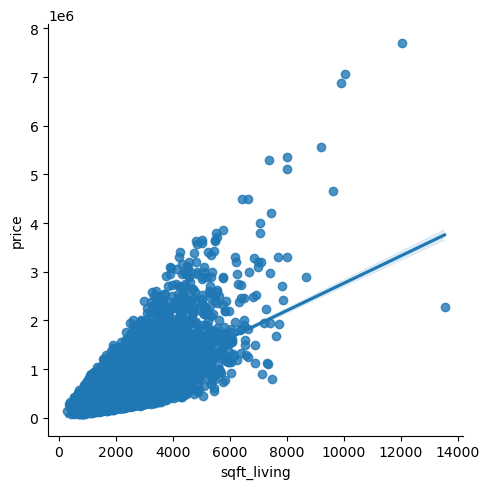

In [28]:
# Create a scotterplot between sqft_living and price

sns.lmplot(x = 'sqft_living', y = 'price', data = df)

There is a clear relationship between the square foot of living space and the house price. As square foot of living space increases, the houses get more expensive. Starting around 5,000 sqft living space, the house prices tend to increase at higher rate. These could indicate more luxury homes that have other factors influencing price such as architectural design or location. 

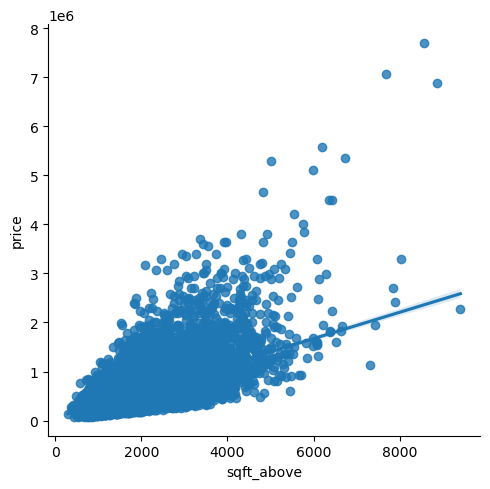

In [30]:
# Create a scotterplot between sqft_above and price

sns.lmplot(x = 'sqft_above', y = 'price', data = df)

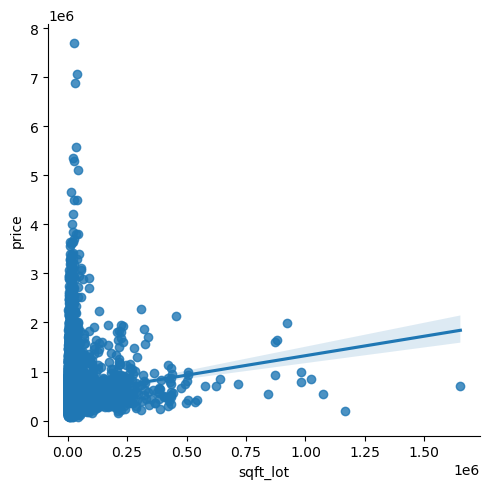

In [32]:
# Create a scotterplot between sqft_lot and price

sns.lmplot(x = 'sqft_lot', y = 'price', data = df)

There is a negative correlation between lot size and price in that as lot size increases, the prices decrease. This could be due to the density of urban vs suburban areas.

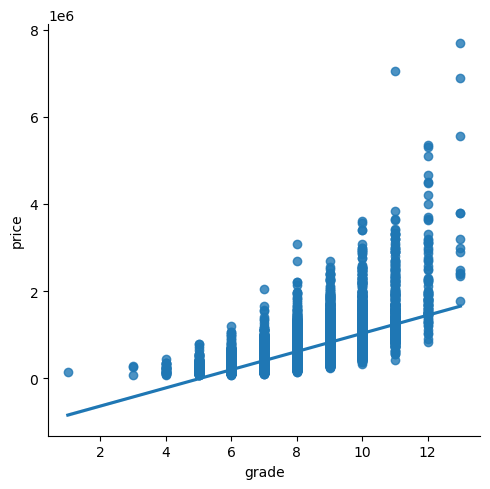

In [34]:
# Create a scotterplot between grade and price

sns.lmplot(x = 'grade', y = 'price', data = df)

There is a positive correlation between grade and price. As the quality of the construction improves, the house prices increase as well. There is significant variability in price between each grade which could indicate other factors influencing price than just grade alone. 

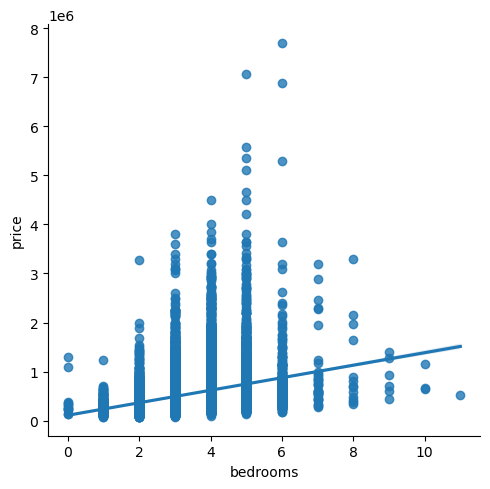

In [36]:
# Create a scotterplot between bedrooms and price

sns.lmplot(x = 'bedrooms', y = 'price', data = df)

As shown in the scatterplot, there is a bell curve distribution. As the number of bedrooms increases, the house price first increases, then peaks between 4-6 bedrooms, and then begins to fall. Possibly homes with many bedrooms such as 8+ have smaller rooms which could be less popular among home buyers. The lowest priced homes have 0-1 and 9+ bedrooms. The highest priced homes have 5-6 bedrooms. 

In general, there is a positive linear correlation in that despite the bell curve, the price of homes with 8+ bedrooms are generally higher than those with 2 or less. 

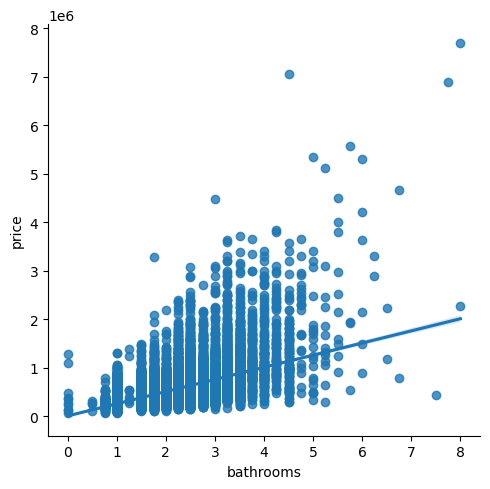

In [38]:
# Create a scotterplot between bathrooms and price

sns.lmplot(x = 'bathrooms', y = 'price', data = df)

The general trend between the number of bathrooms and price is that as the number of bathrooms increase the price of the house also goes up. The majority of homes have between 1.5 to 4.5 bathrooms. For homes with 5 or more, there is a lot of variability in price with some homes being very high priced, and some less than $100,000. 

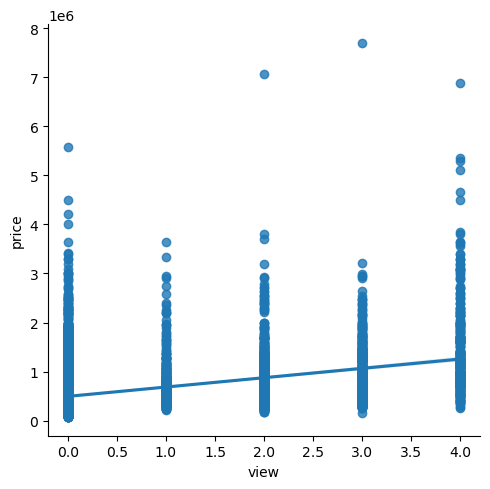

In [40]:
# Create a scotterplot between view and price

sns.lmplot(x = 'view', y = 'price', data = df)

Generally speaking there is an upward trend as the view rating increases, the price of home also increases. The increase is slight and there is a lot of variability in house price for each view rating. Homes rated either a 0 (poor view) and 4 (good view) have a similar shape in their price variability. Whereas homes rated 1 - 3 have slighltly less variability in price and the prices are generally slightly lower for those view ratings.

### 3.3 Pair Plot

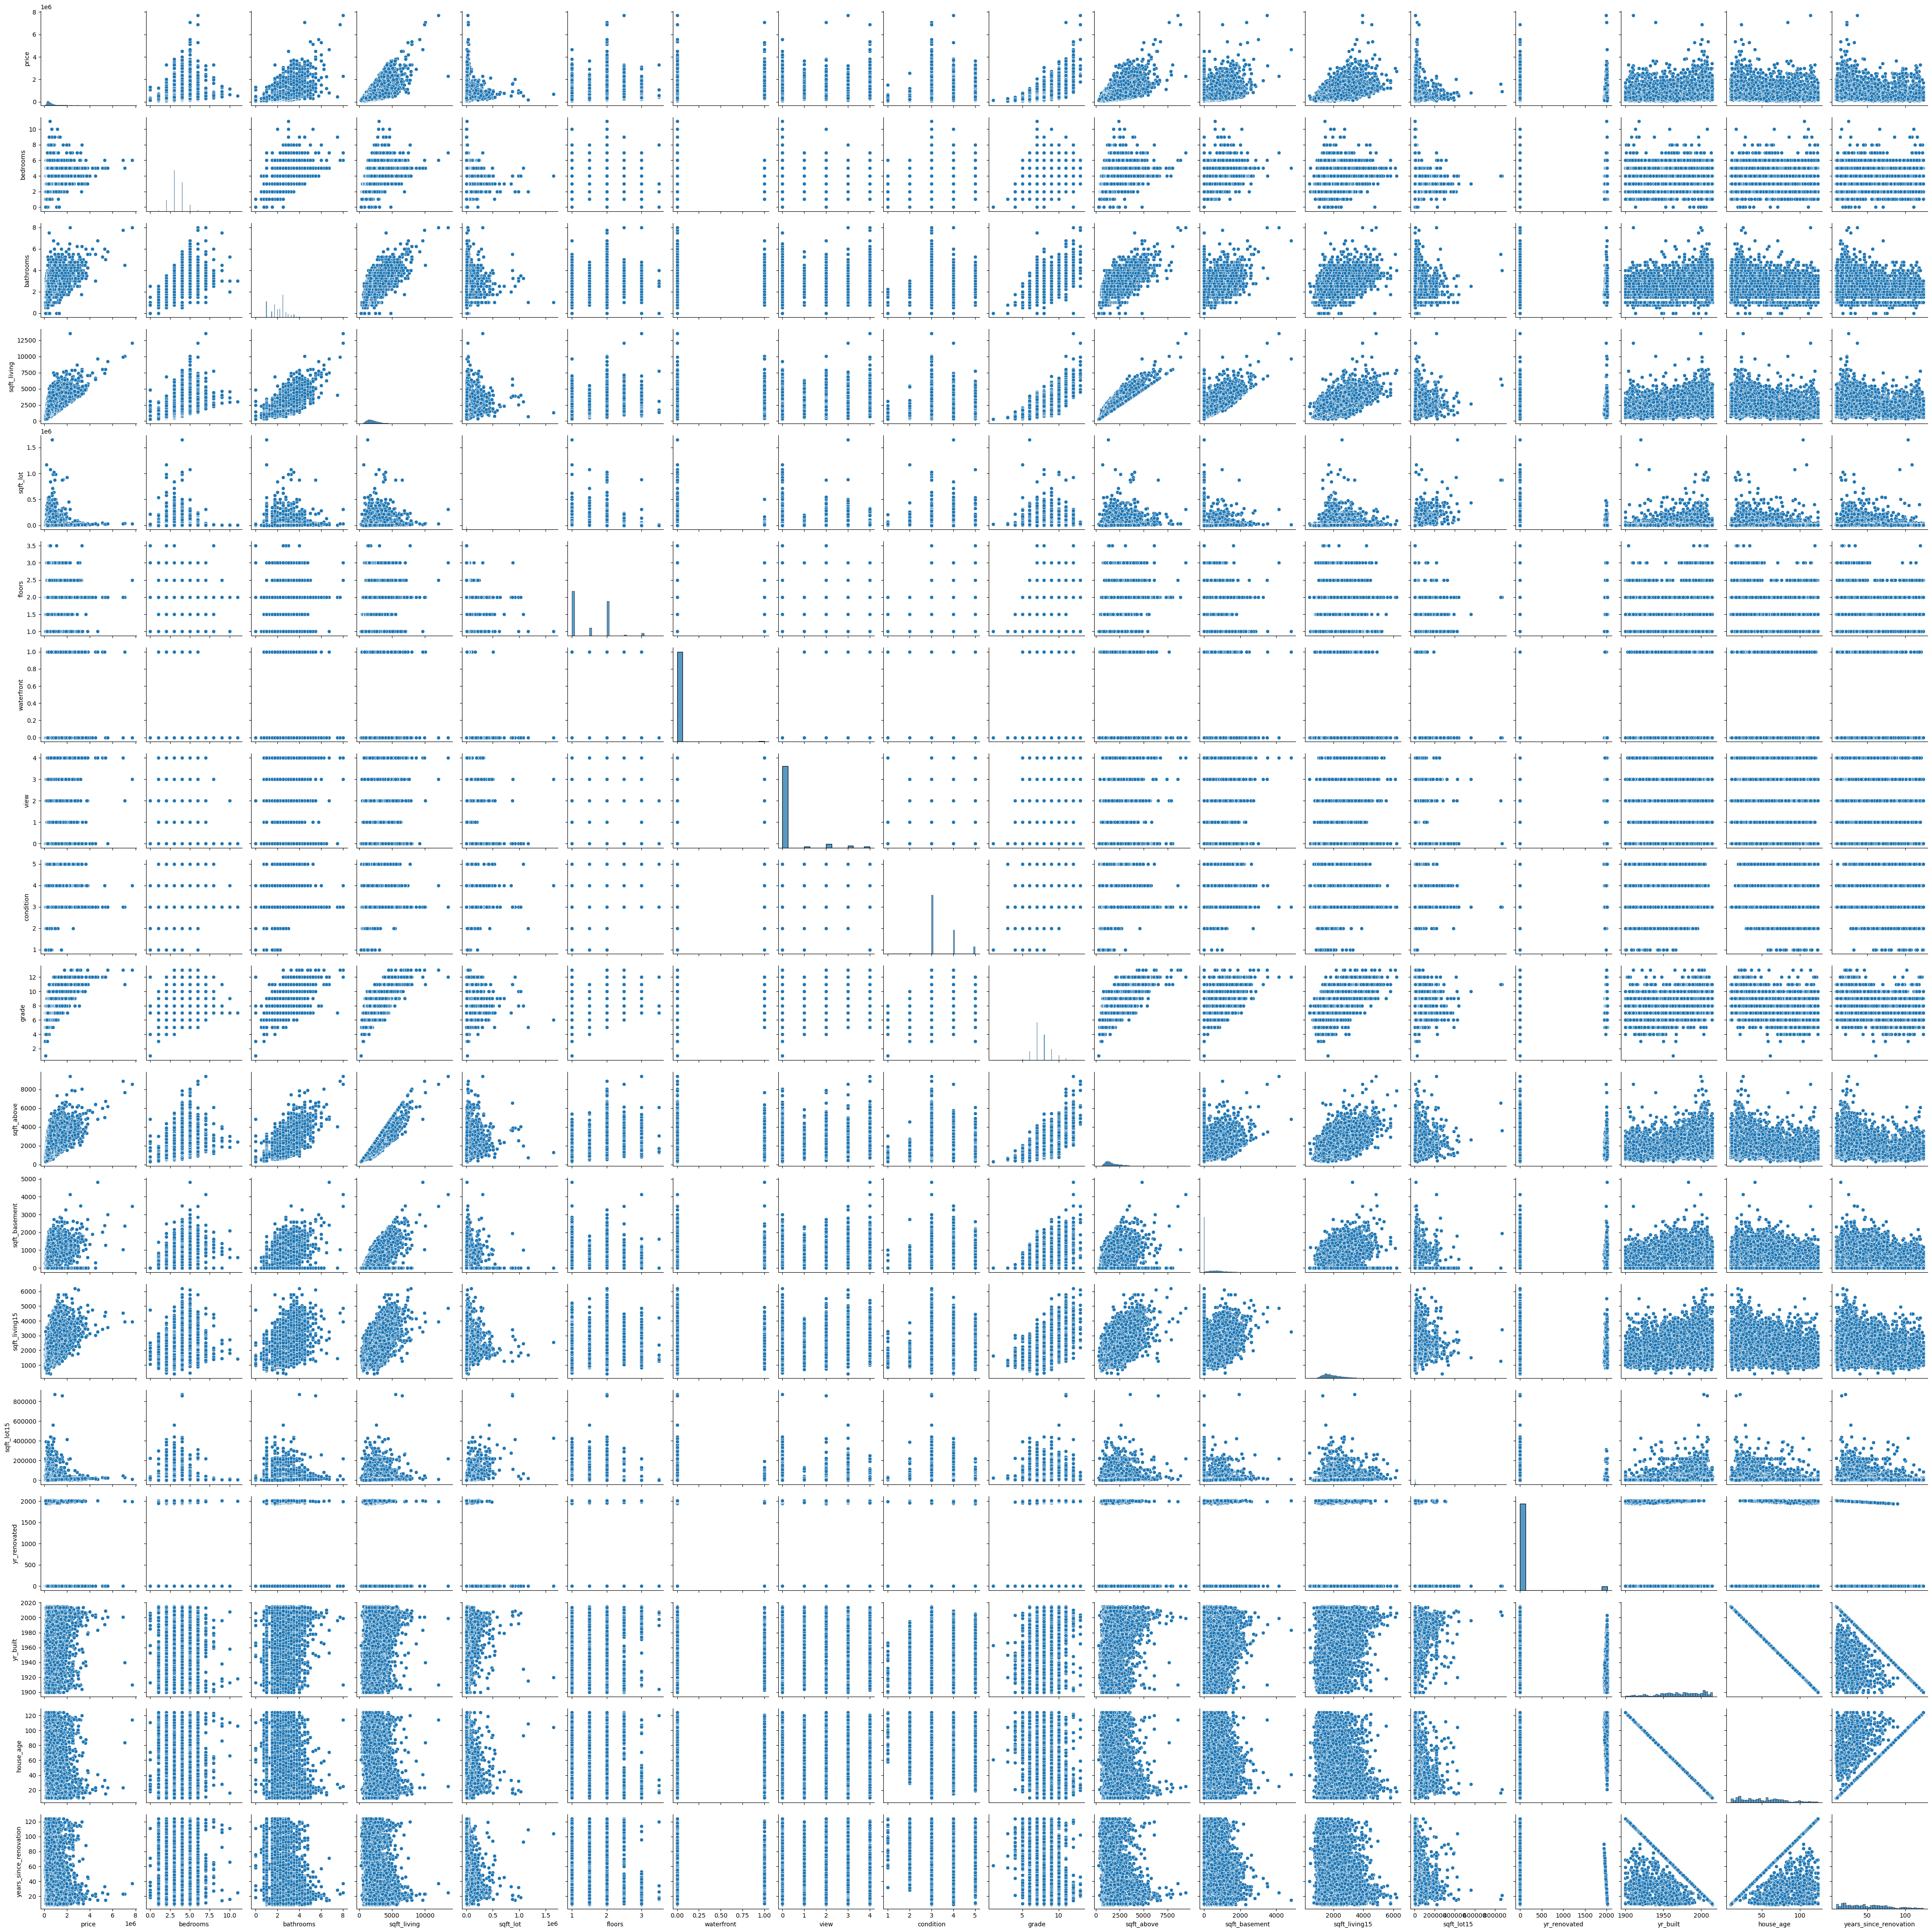

In [42]:
# Create a pairplot of the entire dataframe

sns.pairplot(sub)
plt.savefig('C:/Users/ashle/Downloads/pairplot.png')

The variables show several linear and non-linear relationships, especially when considering grade, sqft_living, and price.
Some variables, such as sqft_lot, exhibit more variability and might be influenced heavily by location or other contextual factors (urban vs. suburban).

Variables to explore further: 
- Price vs. Sqft_lot
    - Some smaller lots are associated with higher price points, while larger lots often show lower prices.
    - Investigate whether this trend is due to location factors (urban vs. suburban areas) or other characteristics like proximity to amenities or neighborhood quality.
- Grade vs. Sqft_lot
    - The relationship between grade and sqft_lot shows a bell-shaped distribution. Initially, as grade increases, lot size increases, but after a certain point, the lot size decreases even as grade increases further.
    - This could indicate that very high-grade homes are often located on smaller lots in premium locations, such as city centers. Understanding why high-grade homes have smaller lots and if it's related to urban vs. suburban settings would be valuable.
- Grade vs. Sqft_living
    - A strong positive correlation exists between grade and sqft_living. As the grade improves, the amount of living space increases at an accelerating pace, particularly as the grade approaches the higher end (closer to 10).
    - This makes intuitive sense, as better-grade homes tend to offer more living space. Exploring whether this relationship holds true across different neighborhoods or price ranges would provide insight into how home quality is reflected in size.
- Floors vs. Sqft_lot
    - There's an interesting negative relationship between number of floors and lot size. As the lot size decreases, the number of floors tends to increase.
    - This suggests that homes on smaller lots are often built vertically, which might be common in urban areas with space constraints. Exploring the relationship between urban density, lot size, and building height (number of floors) could yield insights into how land is used efficiently in high-density areas.

- Bathrooms vs. Price
    - Price seems to increase as the number of bathrooms increases, but there is considerable spread in the data. Homes with 2-3 bathrooms show a wide range of price points, indicating that other factors (like size, location, or grade) likely play a role.
    - Examining how bathroom count interacts with other features (like home size, grade, or location) to influence price would be valuable. This could reveal the point at which additional bathrooms no longer contribute as significantly to price.
 
- Bedrooms vs. Price
    - Price seems to increase as the number of bedrooms increases up to a point. After 5 bedrooms, the price starts to decline. This indicates other factors contributing to house prices. Investigate why higher bedrooms result in lower house prices. 


### 3.4 Categorical Plots

In [44]:
# Calculate mean and standard deviation of price for creating price categories.
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define price categories:
# - Low Price: More than 1 standard deviation below the mean
# - Middle Price: Within 1 standard deviation of the mean
# - High Price: More than 1 standard deviation above the mean

# This method is chosen to avoid arbitrary price range divisions and instead, use the 
# distribution of the data itself. The mean price in the dataset is $540,083. 
# Given that house prices are heavily clustered around the mean with some very high 
# outliers, using the standard deviation method allows us to better account for 
# the natural spread in the data without introducing external biases.

df.loc[df['price'] < mean_price - std_price, 'price_category'] =  'Low price'
df.loc[(df['price'] >= mean_price - std_price) & (df['price'] <= mean_price + std_price), 'price_category'] = 'Middle price'
df.loc[df['price'] >= mean_price + std_price, 'price_category'] = 'High price'

In [46]:
# Check the distribution
df['price_category'].value_counts()

price_category
Middle price    19213
High price       2009
Low price         390
Name: count, dtype: int64

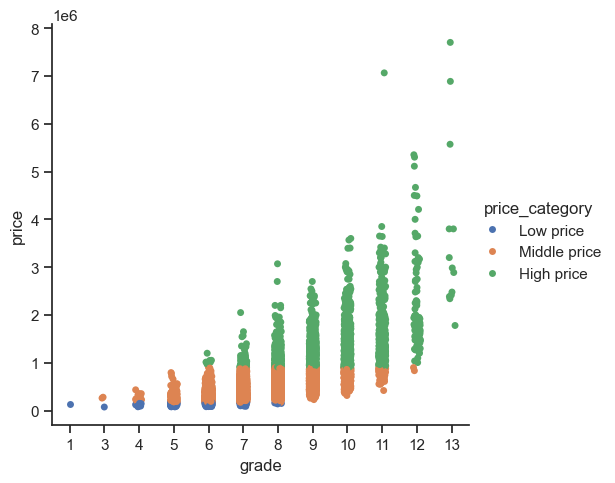

In [48]:
# Create the categorical plot

sns.set(style='ticks')
g = sns.catplot(x='grade', y= 'price', hue='price_category', data=df)

Low price houses tend to have lower grades (between 1 and 7). 7 is considered average. 
Middle priced homes have varying grade levels indicating that there are other factors likely influencing price. Middle priced homes range from grade 3 to 12. 
High priced homes tend to have a better grade. They are between 6 and 13. 

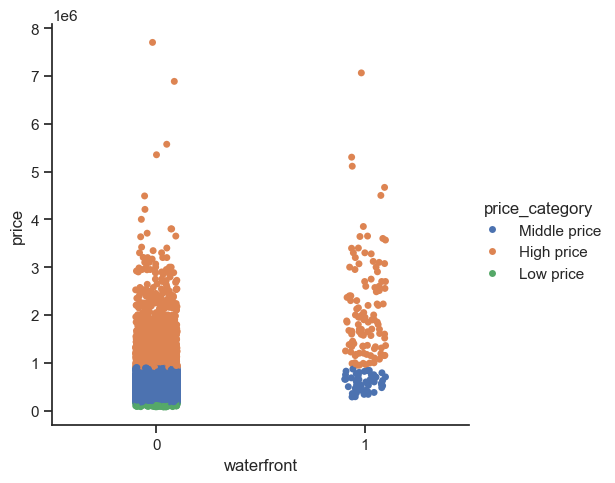

In [50]:
# Create the categorical plot

sns.set(style='ticks')
g = sns.catplot(x='waterfront', y= 'price', hue='price_category', data=df)

The vast majority of houses in King County are not waterfront. 

Houses in the low price category are likely not waterfront. 
Houses in the middle and high price category are likely not waterfront, but the high priced category houses have a higher likelihood of being waterfront. 

In [53]:
# Grade has an index from 1 to 13, where 
# - 1-3 falls short of building construction and design
# - 7 has an average level of construction and design
# - 11-13 have a high quality level of construction and design

df.loc[df['grade'] <= 3, 'grade_category'] = 'Low Grade'
df.loc[(df['grade'] > 3) & (df['grade'] < 11), 'grade_category'] = 'Middle Grade'
df.loc[df['grade'] >= 11, 'grade_category'] = 'High Grade'

In [55]:
df['grade_category'].value_counts(dropna = False)

grade_category
Middle Grade    21106
High Grade        502
Low Grade           4
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69],
 [Text(0, 0, '98001'),
  Text(1, 0, '98002'),
  Text(2, 0, '98003'),
  Text(3, 0, '98004'),
  Text(4, 0, '98005'),
  Text(5, 0, '98006'),
  Text(6, 0, '98007'),
  Text(7, 0, '98008'),
  Text(8, 0, '98010'),
  Text(9, 0, '98011'),
  Text(10, 0, '98014'),
  Text(11, 0, '98019'),
  Text(12, 0, '98022'),
  Text(13, 0, '98023'),
  Text(14, 0, '98024'),
  Text(15, 0, '98027'),
  Text(16, 0, '98028'),
  Text(17, 0, '98029'),
  Text(18, 0, '98030'),
  Text(19, 0, '98031'),
  Text(20, 0, '98032'),
  Text(21, 0, '98033'),
  Text(22, 0, '98034'),
  Text(23, 0, '98038'),
  Text(24, 0, '98039'),

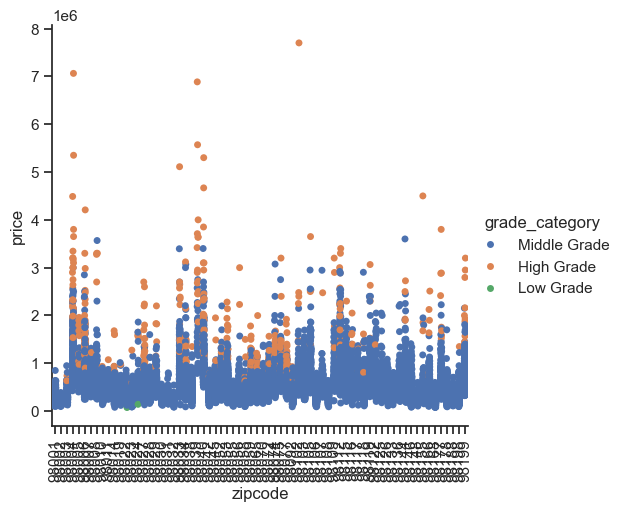

In [57]:
sns.set(style='ticks')
grade_cat_plot = sns.catplot(x='zipcode', y='price', hue='grade_category', data=df)
plt.xticks(rotation=90)

The x-axis is hard to read, but this plot does show significant variance in price and grade category based on specific zip codes indicating that location is a factor. 

## 4. Revisiting Key Questions

What factors have the strongest correlation with house prices? 
- The variables that seem to have a strong correlation with house prices are sqft_living, grade, and bathrooms.

How does the number of bedrooms or bathrooms influence the sale price of homes? 
- The number of bedrooms, has a weaker correlation with price, with more prices increasing as the number of bedrooms increases until 5 bedrooms. Having more than 5 bedrooms, the house prices begin to decline.
- Bathrooms has a noticable relationship with price with a correlation coefficient of .53 (moderate to strong relationship). However, after a certain threshold (around 3 bathrooms), the impact of additional bathrooms on price diminishes.

Which neighborhoods in King County have the highest average home price? 
- There is a lot of variability in home price and lot size. We saw a negative correlation where smaller lots have a higher price and larger lots have lower house prices. Would be interesting to see this plotted geographically to see which locations have higher prices and smaller lot sizes to further visualize the relationship.

Does the year of renovation significantly impact property values in King County? 
- The correlation coefficient for yr_renovated was 0.13 indicating very little to no relationship with price.

How does the proximity to the waterfront impact property values in King County?
- The correlation coefficient is 0.27 indicating a weak relationship with price. Houses in the low price category are likely not waterfront. Houses in the middle and high price category are likely not waterfront, but the high priced category houses have a higher likelihood of being waterfront.

Is there a difference in pricing trends between homes with high ‘view’ scores versus those 
with lower scores?
- Generally speaking there is an upward trend as the view rating increases, the price of home also increases. The increase is slight and there is a lot of variability in house price for each view rating. Homes rated either a 0 (poor view) and 4 (good view) have a similar shape in their price variability. Whereas homes rated 1 - 3 have slighltly less variability in price and the prices are generally slightly lower for those view ratings.
- Houses with higher view scores tend to have larger living spaces and more bathrooms but there is not much impact on pricing.  

## 5. Define hypotheses

**Hypothesis:** If the square footage of living space and the grade of a home are high, then the house price will also be high, as these two factors are the strongest predictors of property value in King County.

Hypothesis: If a house is in a densely populated urban area, then houses with smaller lot sizes have higher prices due to proximity to amenities and higher land demand. Conversely, if a house is in a suburban area, then houses with larger lot sizes have lower prices due to reduced demand and greater land availability.

Hypothesis: If the square footage of living space exceeds 3,000 sqft, then house prices will increase at an accelerated rate in urban areas compared to houses with less than 3,000 square feet of living space. 

In [61]:
# Export data
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'house_data_cleaned_new_variables.csv'), index=False)